# Imports

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import cv2 
import mediapipe as mp
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import  f1_score
import joblib

# Set Pandas options

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Dataset

## Read dataset

In [3]:
data = pd.read_csv('hand_landmarks_data.csv')

## Show dataset head

In [4]:
data.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,x5,y5,z5,x6,y6,z6,x7,y7,z7,x8,y8,z8,x9,y9,z9,x10,y10,z10,x11,y11,z11,x12,y12,z12,x13,y13,z13,x14,y14,z14,x15,y15,z15,x16,y16,z16,x17,y17,z17,x18,y18,z18,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,262.669968,257.304901,-3.649205e-07,257.417542,247.109055,0.004224,246.882957,241.716827,0.005798,236.384537,241.453918,0.005872,230.076668,243.947525,0.005236,238.130150,233.234192,0.000154,225.652794,247.249207,-0.003813,226.056931,255.866364,-0.006753,228.159897,260.384155,-0.007799,236.882492,238.052338,-0.004955,226.113327,252.712662,-0.010097,229.431679,260.451080,-0.014108,232.641357,265.248962,-0.016854,236.293053,244.317657,-0.009528,225.111259,256.214203,-0.016194,227.390144,263.649139,-0.020701,230.754410,268.069519,-0.023142,236.512527,251.706177,-0.013198,223.345093,255.490692,-0.020450,215.043365,258.114746,-0.024577,208.006393,259.608673,-0.026722,call
1,83.351778,346.059113,-2.345265e-07,81.925037,328.562347,-0.011102,90.080132,311.535248,-0.021096,95.641823,298.860626,-0.029252,94.470360,287.298767,-0.034743,108.349709,308.093719,-0.022332,126.623394,317.461853,-0.033495,120.436695,321.913879,-0.039811,113.516293,320.967957,-0.044990,112.661499,318.378937,-0.024038,126.470741,326.580048,-0.032438,119.046581,329.816071,-0.033811,114.183495,329.230194,-0.036610,115.033024,330.221741,-0.026222,129.401276,335.143341,-0.034942,123.797516,337.128418,-0.030081,118.561386,336.647949,-0.027561,116.245079,341.947784,-0.029042,132.451618,341.794434,-0.038175,142.773582,342.829254,-0.037336,152.431698,343.015991,-0.036136,call
2,187.756977,260.235492,-2.417307e-07,195.460579,241.506035,-0.000184,207.259529,223.674339,-0.009687,215.413628,209.035360,-0.020580,214.772873,196.609588,-0.029497,227.154053,225.576852,-0.016897,245.390419,237.862886,-0.023851,239.404152,244.408742,-0.024241,232.023811,244.865198,-0.024215,229.581985,237.329024,-0.025533,245.673843,248.809410,-0.029864,238.769005,254.638094,-0.027649,231.852882,253.995576,-0.027500,230.325073,251.093664,-0.033584,246.591980,260.490353,-0.038898,240.098305,265.280085,-0.033344,233.025467,264.505473,-0.030234,230.100174,265.584175,-0.041256,250.301010,268.602938,-0.044068,262.425133,271.276638,-0.040469,272.989952,272.272231,-0.038301,call
3,114.976696,331.594238,-1.233261e-07,114.503494,320.549957,-0.002824,116.636627,310.080994,-0.008911,117.685066,301.874115,-0.015029,116.766609,294.977814,-0.019514,129.777031,308.501129,-0.010413,139.635818,310.151733,-0.016497,136.397449,312.745758,-0.020082,131.874081,313.205322,-0.023151,132.963112,315.039551,-0.014133,141.762932,315.943848,-0.018309,138.536854,317.723969,-0.019228,134.968494,319.064636,-0.021387,134.844761,322.039795,-0.017837,143.293087,322.025909,-0.021707,140.613567,323.325195,-0.018406,137.043560,324.407806,-0.017291,135.485836,329.050110,-0.021804,145.195450,329.357544,-0.027622,151.053200,329.712341,-0.027863,155.990364,329.548828,-0.027723,call
4,188.795288,141.727867,-1.622995e-07,188.520905,127.947464,-0.002884,191.982880,111.010563,-0.008115,192.552521,98.687691,-0.013397,188.239563,90.394289,-0.017483,202.827484,110.826588,-0.013008,219.390350,112.392162,-0.019843,215.733658,117.425114,-0.022405,210.229782,118.631218,-0.024263,206.339752,118.629364,-0.016029,221.155609,120.211258,-0.021682,217.215561,124.373337,-0.022350,212.064911,125.186268,-0.023731,209.829666,126.978264,-0.018826,223.595139,127.696289,-0.023907,219.652115,130.917194,-0.020978,214.071228,131.502628,-0.019323,213.105820,135.293209,-0.021623,226.696396,132.263248,-0.025113,234.831741,130.684147,-0.024087,241.587769,128.477188,-0.023486,call


## Show some statiatics

In [5]:
data.describe()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,x5,y5,z5,x6,y6,z6,x7,y7,z7,x8,y8,z8,x9,y9,z9,x10,y10,z10,x11,y11,z11,x12,y12,z12,x13,y13,z13,x14,y14,z14,x15,y15,z15,x16,y16,z16,x17,y17,z17,x18,y18,z18,x19,y19,z19,x20,y20,z20,x21,y21,z21
count,25675.000000,25675.000000,2.567500e+04,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000
mean,201.958632,260.158527,1.272461e-07,202.517395,252.115322,-0.009465,202.862981,240.645966,-0.015946,203.025267,231.684450,-0.022772,202.966979,226.269003,-0.029150,202.748369,226.255575,-0.011015,203.047902,213.496471,-0.023341,203.025185,206.581444,-0.031587,202.939537,200.498964,-0.036539,202.332967,226.209064,-0.014324,202.520204,213.070576,-0.026699,202.481818,207.660820,-0.033022,202.434025,202.627671,-0.035749,202.027209,229.245052,-0.018841,202.177061,220.038483,-0.032494,202.211731,220.993717,-0.034022,202.232146,221.068921,-0.032048,201.721609,234.378377,-0.024129,201.792374,227.455597,-0.033751,201.811275,227.802576,-0.032208,201.874802,227.807287,-0.028828
std,90.500333,76.533210,2.737932e-07,84.770933,75.384691,0.010376,80.412089,74.721921,0.013973,79.647588,74.923091,0.017201,80.777001,75.433577,0.020555,81.486053,74.174662,0.011410,78.660264,75.193943,0.016304,77.695517,76.414925,0.019864,77.304606,77.817092,0.022231,85.044490,74.757306,0.012105,84.003401,76.411499,0.018234,83.878024,78.804974,0.020896,83.966876,81.326327,0.022003,89.052866,75.530619,0.013458,89.047221,76.805159,0.020278,88.354398,78.553745,0.021083,88.068275,80.635173,0.021304,93.354905,76.412992,0.015658,94.046497,77.231210,0.020453,93.664595,78.441253,0.020877,93.547017,79.963438,0.021136
min,-36.050926,45.722923,-2.029986e-06,7.184681,51.256840,-0.096630,25.114323,45.489950,-0.155846,23.446341,38.851536,-0.223258,13.243541,19.964561,-0.282578,23.007730,41.025543,-0.176002,7.846868,12.058107,-0.242614,24.513308,27.764654,-0.279875,20.750772,11.701990,-0.302675,26.686532,38.545681,-0.178811,11.681391,17.029541,-0.230100,21.732645,24.313637,-0.269950,12.205227,9.170517,-0.282490,18.742111,35.284714,-0.170851,8.862213,15.022144,-0.271215,11.509277,21.557108,-0.278481,13.415025,11.011627,-0.253293,4.522356,30.686922,-0.201897,0.198635,20.146784,-0.286821,3.278137,32.158108,-0.286470,-4.537216,23.226204,-0.262047
25%,124.110329,205.815950,-5.243216e-08,130.535929,197.999625,-0.015199,136.711035,187.018583,-0.023020,138.905817,177.897360,-0.030877,139.830317,172.346912,-0.038417,135.349077,173.119514,-0.016189,139.631676,160.014862,-0.030574,141.088646,151.965836,-0.040268,141.518023,144.926865,-0.046269,131.467953,172.890533,-0.019602,133.723944,158.572586,-0.034752,134.446735,151.556170,-0.042468,134.941040,145.513020,-0.045741,128.587727,175.506911,-0.024630,130.301594,165.454178,-0.041456,130.504211,165.620058,-0.043919,130.167824,164.591892,-0.042403,126.202721,180.296774,-0.030728,126.828913,172.720392,-0.042726,126.887403,172.345467,-0.041957,126.356627,172.083794,-0.039220
50%,199.667847,255.181793,1.497277e-07,199.979530,247.113892,-0.008737,200.092758,235.776978,-0.014231,200.482040,226.828033,-0.020179,200.140117,221.246796,-0.025666,199.457932,221.213181,-0.009502,199.514259,208.351471,-0.020488,199.270821,201.778839,-0.027943,199.146263,195.717651,-0.032342,199.286728,220.864047,-0.012345,199.699150,20

## Show data Info

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25675 entries, 0 to 25674
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      25675 non-null  float64
 1   y1      25675 non-null  float64
 2   z1      25675 non-null  float64
 3   x2      25675 non-null  float64
 4   y2      25675 non-null  float64
 5   z2      25675 non-null  float64
 6   x3      25675 non-null  float64
 7   y3      25675 non-null  float64
 8   z3      25675 non-null  float64
 9   x4      25675 non-null  float64
 10  y4      25675 non-null  float64
 11  z4      25675 non-null  float64
 12  x5      25675 non-null  float64
 13  y5      25675 non-null  float64
 14  z5      25675 non-null  float64
 15  x6      25675 non-null  float64
 16  y6      25675 non-null  float64
 17  z6      25675 non-null  float64
 18  x7      25675 non-null  float64
 19  y7      25675 non-null  float64
 20  z7      25675 non-null  float64
 21  x8      25675 non-null  float64
 22

## Check for nulls

In [7]:
data[data.isna()].value_counts()

Series([], Name: count, dtype: int64)

# Label distribution

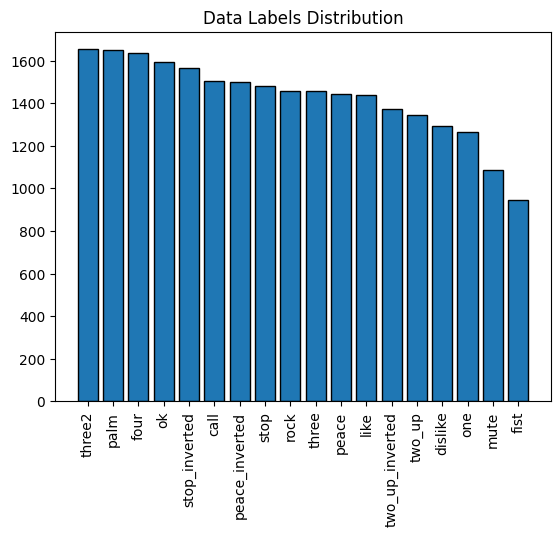

In [8]:
plt.bar(data['label'].value_counts().index, data['label'].value_counts().values, edgecolor='black')
plt.xticks(rotation=90)
plt.title("Data Labels Distribution")
plt.show()

# visualize some data

In [9]:
connections = [
    (0, 1), (1, 2), (2, 3), (3, 4),   # Thumb
    (0, 5), (5, 6), (6, 7), (7, 8),   # Index finger
    (0, 9), (9, 10), (10, 11), (11, 12),  # Middle finger
    (0, 13), (13, 14), (14, 15), (15, 16),  # Ring finger
    (0, 17), (17, 18), (18, 19), (19, 20),  # Little finger
]

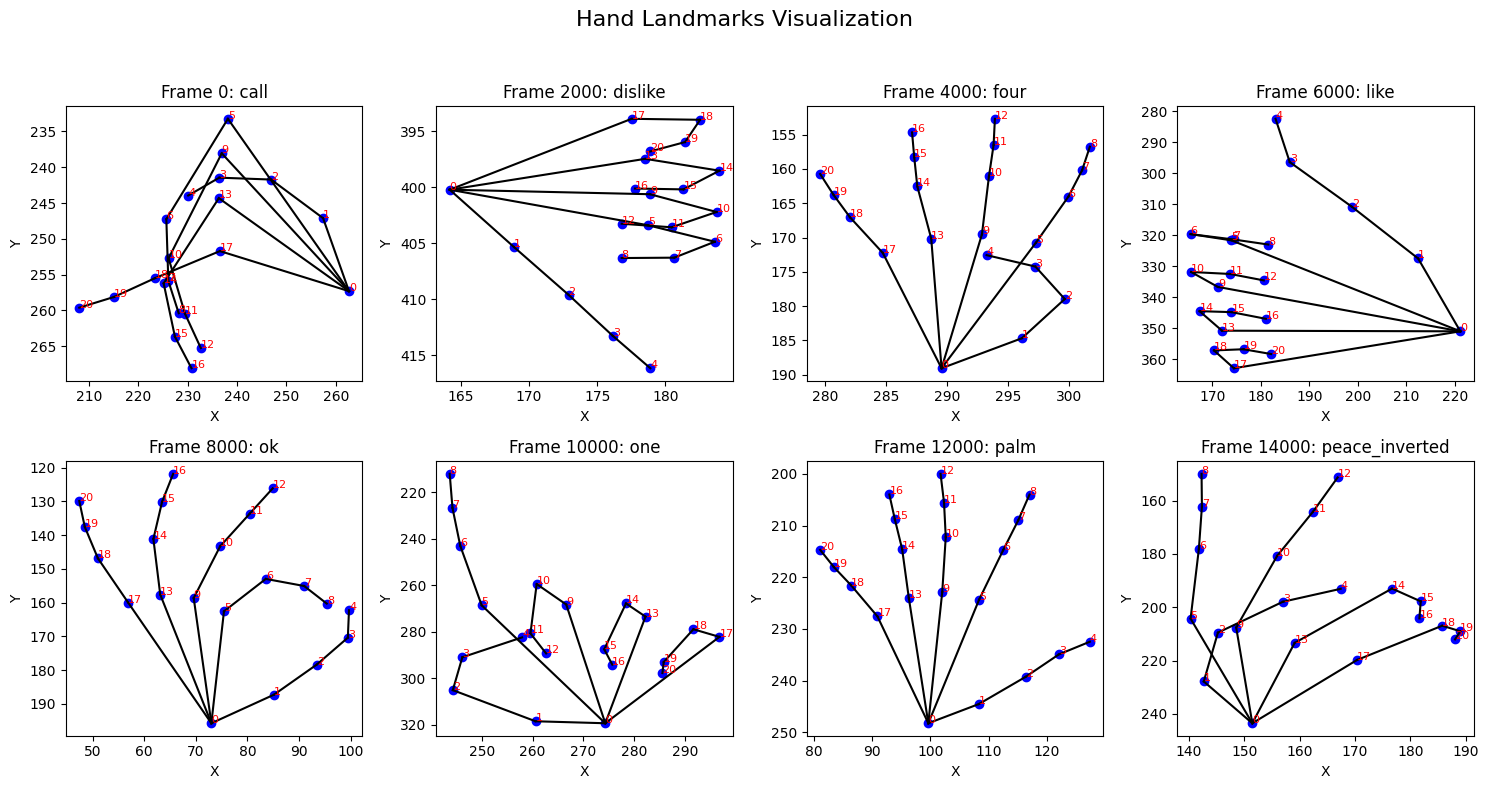

In [10]:
fig, axes = plt.subplots(2, 4, figsize=(15, 8))  
fig.suptitle("Hand Landmarks Visualization", fontsize=16)

indices = [i * 2000 for i in range(8)]

for ax, idx in zip(axes.flatten(), indices):
    if idx >= len(data):  
        continue

    x = [data.iloc[idx][f"x{i}"] for i in range(1, 22)]
    y = [data.iloc[idx][f"y{i}"] for i in range(1, 22)]
    
    ax.scatter(x, y, c="blue")

    for start, end in connections:
        ax.plot([x[start], x[end]], [y[start], y[end]], c="black", linewidth=1.5)

    for i, (xi, yi) in enumerate(zip(x, y)):
        ax.text(xi, yi, str(i), fontsize=8, color="red")

    ax.set_title(f"Frame {idx}: {data.iloc[idx]['label']}")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.invert_yaxis() 

plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()

## Split data into input and target

In [11]:
feature_cols = [col for col in data.columns if col.startswith(('x', 'y', 'z'))]
X = data[feature_cols].values
y = data['label'].values

## Centers the hand at the wrist 

In [12]:
X = X.reshape(X.shape[0], 21, 3)
wrist = X[:, 0, :2]
mid_finger_tip = X[:, 12, :2]


In [13]:
X[:, :, :2] -= wrist[:, None, :]
X[:, :, :2] /= mid_finger_tip[:, None, :]
X = X.reshape(X.shape[0], -1)

## Split the data into train and test

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42, stratify=y)

In [22]:
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

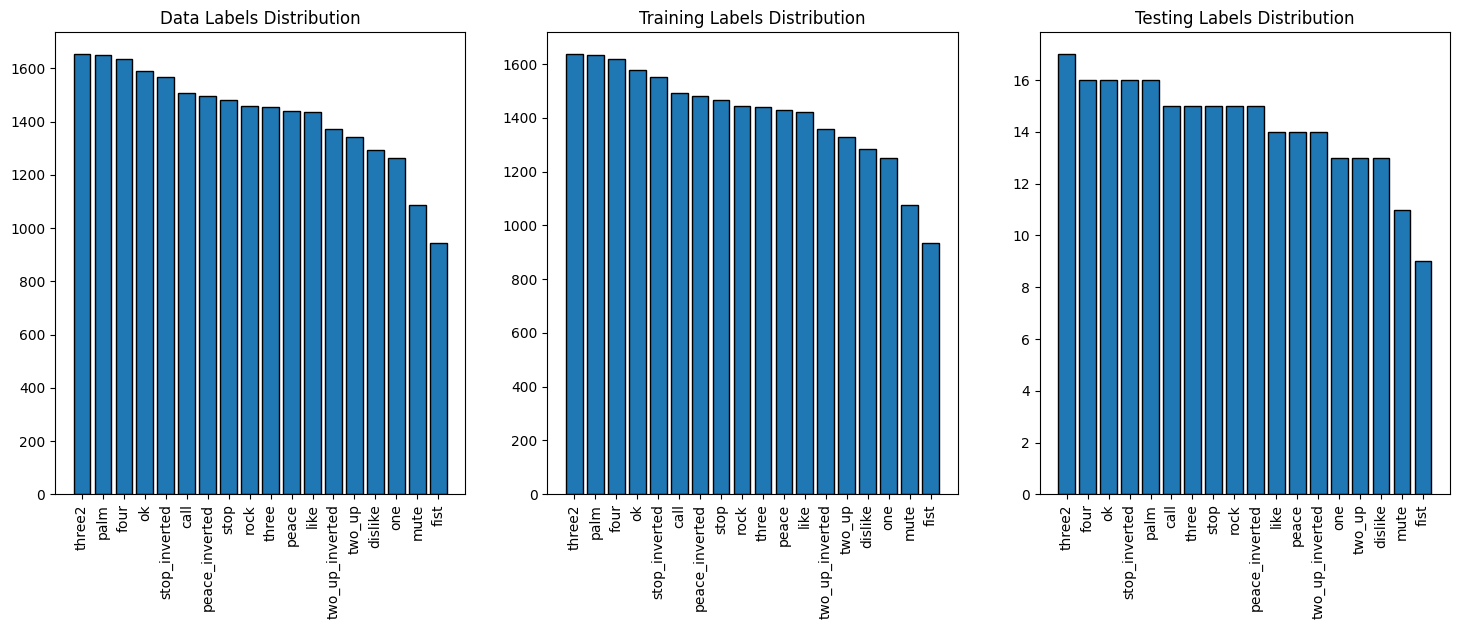

In [24]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

ax[0].bar(data['label'].value_counts().index, data['label'].value_counts().values, edgecolor='black')
ax[0].set_title("Data Labels Distribution")
ax[0].tick_params(axis='x', rotation=90)

ax[1].bar(y_train_series.value_counts().index, y_train_series.value_counts().values, edgecolor='black')
ax[1].set_title("Training Labels Distribution")
ax[1].tick_params(axis='x', rotation=90)

ax[2].bar(y_test_series.value_counts().index, y_test_series.value_counts().values, edgecolor='black')
ax[2].set_title("Testing Labels Distribution")
ax[2].tick_params(axis='x', rotation=90)

plt.show()

## Standardize the dataset

### Fit the scaler

In [25]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [26]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

### Transform the train and test set

In [27]:
X_train_scaled = scaler.transform(X_train)

In [28]:
X_test_scaled = scaler.transform(X_test, scaler)

evaluation Function

In [29]:
def eval_model(model, X, y):
    pred = model.predict(X)
    print(f"f1_score: {f1_score(y, pred, average='weighted'):.2f}, Accuracy: {model.score(X, y):.2f}")

# Models
- Logistic regression (perceptron)
- k nearest neighbor (KNN)
- GradientBoostingClassifier
- Random Forest
- Support vector machine (SVM)

## Logistic Regression

In [30]:
logistic_reg = SGDClassifier(loss="log_loss",tol=None, max_iter=5000, random_state=43)

In [31]:
logistic_reg.fit(X_train_scaled, y_train)

SGDClassifier(loss='log_loss', max_iter=5000, random_state=43, tol=None)

In [32]:
eval_model(logistic_reg, X_test_scaled, y_test)

f1_score: 0.84, Accuracy: 0.84


In [33]:
joblib.dump(logistic_reg, "logistic_reg.pkl")

['logistic_reg.pkl']

## K nearest neighbor

In [34]:
knn = KNeighborsClassifier(n_neighbors=5)

In [35]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [36]:
eval_model(knn, X_test_scaled, y_test)

f1_score: 0.81, Accuracy: 0.81


In [37]:
joblib.dump(knn, "knn.pkl")

['knn.pkl']

## Gradient Boosting Classifier

In [38]:
gbc = GradientBoostingClassifier()

In [39]:
gbc.fit(X_train_scaled, y_train)

GradientBoostingClassifier()

In [40]:
eval_model(gbc, X_test_scaled, y_test)

f1_score: 0.97, Accuracy: 0.97


In [41]:
joblib.dump(gbc, "gbc.pkl")

['gbc.pkl']

## Random Forest

In [52]:
rf_model = RandomForestClassifier(n_estimators=100)

In [53]:
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [54]:
eval_model(rf_model, X_test_scaled, y_test)

f1_score: 0.99, Accuracy: 0.99


In [55]:
joblib.dump(rf_model, "rf_model.pkl")

['rf_model.pkl']

## Support Vector Machine (SVM)

### rbf kernal

In [56]:
svm_rbf = SVC(random_state=43)

In [57]:
svm_rbf.fit(X_train_scaled, y_train)

SVC(random_state=43)

In [58]:
eval_model(svm_rbf, X_test_scaled, y_test)

f1_score: 0.82, Accuracy: 0.82


In [63]:
joblib.dump(svm_rbf, "svm_rbf.pkl")

['svm_rbf.pkl']

### Linear kernal

In [59]:
svm_linear = SVC(kernel='linear', random_state=43)

In [60]:
svm_linear.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=43)

In [61]:
eval_model(svm_linear, X_test_scaled, y_test)

f1_score: 0.86, Accuracy: 0.86


In [64]:
joblib.dump(svm_linear, "svm_linear.pkl")

['svm_linear.pkl']

# Media Pipe

## load Model and the Scaler

In [65]:
model = joblib.load("rf_model.pkl")  
scaler = joblib.load("scaler.pkl")  

## Set Hand model

In [66]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
hands = mp_hands.Hands(min_detection_confidence=0.5, min_tracking_confidence=0.5)

I0000 00:00:1742861995.837640 3651541 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1742861995.858378 3684189 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1742861995.865291 3684189 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


## Set Capture

In [67]:
capture = cv2.VideoCapture(0, cv2.CAP_AVFOUNDATION)
if not capture.isOpened():
    print("Error: Could not open camera.")
    exit()

## Preprocessing Landmark

In [72]:
def preprocess_landmarks(hand_landmarks):
    points = np.array([[lm.x, lm.y, lm.z] for lm in hand_landmarks])

    if points.shape != (21, 3):  
        print(f"Error: Expected 21 landmarks, but got shape {points.shape}. Skipping frame.")
        return None  
    wrist = points[0, :2]
    mid_finger_tip = points[12, :2]
    points[:, :2] -= wrist 
    points[:, :2] /= mid_finger_tip  
    
    points = points.flatten().reshape(1, -1) 

    points = scaler.transform(points)  

    return points.flatten() 

## Model Use in real time

In [74]:
while True:
    ret, frame = capture.read()
    if not ret:
        break

    frame = cv2.resize(frame, (640, 480))
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = hands.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)


            landmark_vector = preprocess_landmarks(hand_landmarks.landmark)
            if landmark_vector is None:
                continue  

            prediction = model.predict([landmark_vector])[0]

            cv2.putText(image, f"Prediction: {prediction}", (10, 50), 
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    cv2.imshow("Hand Landmarks", image)
    if cv2.waitKey(5) & 0xFF == ord('q'):
        break

capture.release()
cv2.destroyAllWindows()